In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [96]:
# !pip -q install sastrawi

# Data Collection

In [97]:
# Load dataset

data = pd.read_csv('reviews.csv')

In [98]:
# Menampilkan 5 data teratas

data.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [99]:
# Melihat info dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [100]:
data.isnull().sum()

itemId                 0
category               0
name                   0
rating                 0
originalRating    203779
reviewTitle       180383
reviewContent      96758
likeCount              0
upVotes                0
downVotes              0
helpful                0
relevanceScore         0
boughtDate          7107
clientType             0
retrievedDate          0
dtype: int64

In [101]:
list(data)

['itemId',
 'category',
 'name',
 'rating',
 'originalRating',
 'reviewTitle',
 'reviewContent',
 'likeCount',
 'upVotes',
 'downVotes',
 'helpful',
 'relevanceScore',
 'boughtDate',
 'clientType',
 'retrievedDate']

In [102]:
# Menghapus kolom yang tidak diperlukan

data.drop(
    columns=[
        "itemId",
        "category",
        "name",
        "originalRating",
        "reviewTitle",
        "likeCount",
        "upVotes",
        "downVotes",
        "helpful",
        "relevanceScore",
        "boughtDate",
        "clientType",
        "retrievedDate",
    ],
    inplace=True,
)


In [103]:
# Menghapus baris yang memiliki nilai NaN
data = data.drop(data[data['reviewContent'].isnull()].index)

# Mereset index agar index dimulai dari 0
data = data.reset_index(drop=True)

In [104]:
data.isnull().sum()

rating           0
reviewContent    0
dtype: int64

In [105]:
data

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,1,bima
...,...,...
107024,5,Wkwkwk
107025,1,seller incapable to keep his product page clea...
107026,5,barang bagus dengan harga kompetitif
107027,3,Ok.thank lazada Pagi order sore barang nyampe ...


In [106]:
print(data['rating'].unique())

[5 4 1 3 2]


In [107]:
print ('Total Jumlah Review:', data.shape[0],'data\n')
print ('Terdiri dari (Rating)')

print('--- [1] Bintang 1 \t:', data[data.rating==1].shape[0],'data')
print('--- [2] Bintang 2 \t:', data[data.rating==2].shape[0],'data')
print('--- [3] Bintang 3 \t:', data[data.rating==3].shape[0],'data')
print('--- [4] Bintang 4 \t:', data[data.rating==4].shape[0],'data')
print('--- [5] Bintang 5 \t:', data[data.rating==5].shape[0],'data')

Total Jumlah Review: 107029 data

Terdiri dari (Rating)
--- [1] Bintang 1 	: 6951 data
--- [2] Bintang 2 	: 2184 data
--- [3] Bintang 3 	: 4372 data
--- [4] Bintang 4 	: 10626 data
--- [5] Bintang 5 	: 82896 data


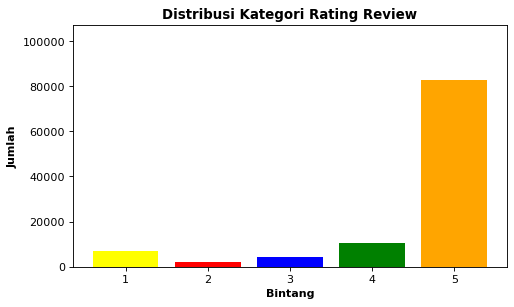

In [108]:
# Visualisasi Label Review Berdasarkan Rating

heights = data['rating'].value_counts().sort_index()
labels = ('1', '2', '3', '4', '5')
y_pos = np.arange(len(labels))

plt.figure (figsize=(7, 4), dpi=80)
plt.ylim(0, data.shape[0])
plt.title('Distribusi Kategori Rating Review', fontweight='bold')
plt.xlabel('Bintang', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos,heights,color=['yellow', 'red', 'blue', 'green', 'orange'])
plt.xticks(y_pos, labels)
plt.show()

In [109]:
conditions = [
    (data['rating'] == 3),
    (data['rating'] > 3),
    (data['rating'] < 3)
]

values = ['2', '1', '0']

data['rating'] = np.select(conditions, values)
data.rating = data.rating.astype(int)

print('--- [0] Review Negatif \t:', data[data.rating==0].shape[0],'data')
print('--- [1] Review Positif \t:', data[data.rating==1].shape[0],'data')
print('--- [2] Review Normal  \t:', data[data.rating==2].shape[0],'data')

--- [0] Review Negatif 	: 9135 data
--- [1] Review Positif 	: 93522 data
--- [2] Review Normal  	: 4372 data


In [110]:
# Mengambil sample masing-masing 4000 dari tiap target

length = data['rating'].value_counts().size
for i in range(length):
    data[data.rating==i] = data[data.rating==i].sample(4000)

data = data.drop(data[data['reviewContent'].isnull()].index)
data = data.reset_index(drop=True)
data.rating = data.rating.astype(int)

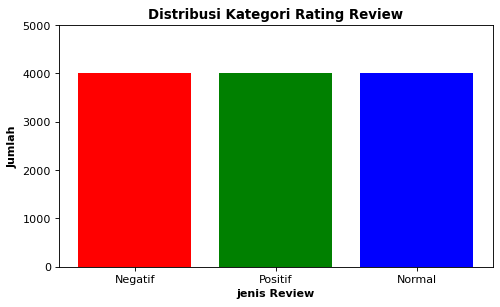

In [111]:
heights = data['rating'].value_counts().sort_index()
labels = ('Negatif', 'Positif', 'Normal')
y_pos = np.arange(len(labels))

plt.figure (figsize=(7, 4), dpi=80)
plt.ylim(0, 5000)
plt.title('Distribusi Kategori Rating Review', fontweight='bold')
plt.xlabel('jenis Review', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos,heights,color=['red', 'green', 'blue'])
plt.xticks(y_pos, labels)
plt.show()

# Text Pre-Processing

## Case Folding

In [112]:
import re

def case_folding(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[-+]?[0-9]+', '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.strip()
    return text

## Word Normalization

In [113]:
# !wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
key_norm = pd.read_csv('key_norm.csv')

In [114]:
def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text

## Filtering (Stopwords Removal)

In [115]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [117]:
def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return ' '.join(clean_words)

## Stemming

In [118]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = stemmer.stem(text)
    return text

## Text Pre-Processing Pipeline

In [119]:
def text_preprocessing_process(text):
    text = case_folding(text)
    text = text_normalize(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [120]:
%%time
data['clean_text'] = data['reviewContent'].apply(text_preprocessing_process)

CPU times: total: 36min 46s
Wall time: 37min 20s


In [121]:
data.to_csv('clean_data.csv')

# Feature Engineering

In [122]:
X = data['clean_text']
y = data['rating']

## Feature Extraction (TF-IDF & N-Gram)

In [123]:
# Save model
import pickle

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf = vec_TF_IDF.transform(X)

# Save vectorizer.vocabulary_
pickle.dump(vec_TF_IDF.vocabulary_, open('feature_tf-idf.pkl', 'wb'))

In [124]:
# Menampilkan vocabulary dari TF-IDF
vec_TF_IDF.vocabulary_

{'layar': 4586,
 'gar': 2874,
 'kirim': 4166,
 'barang': 739,
 'sesuai': 7573,
 'janji': 3593,
 'express': 2596,
 'jumat': 3753,
 'rabu': 6760,
 'moga': 5351,
 'awet': 444,
 'televisi': 8178,
 'led': 4687,
 'merek': 5233,
 'sharp': 7611,
 'hitam': 3299,
 'lc': 4666,
 'lei': 4690,
 'mati': 5069,
 'total': 8477,
 'mana': 4930,
 'hubung': 3351,
 'bantu': 725,
 'mohon': 5353,
 'bijak': 1037,
 'solusi': 7823,
 'garansi': 2876,
 'lazada': 4592,
 'terimakasih': 8250,
 'super': 7997,
 'sich': 7638,
 'mulusss': 5421,
 'mantapppppp': 4995,
 'aman': 216,
 'mampu': 4927,
 'laptop': 4556,
 'iklan': 3386,
 'dos': 2330,
 'install': 3494,
 'windows': 8910,
 'nya': 5718,
 'overall': 6041,
 'its': 3540,
 'worth': 8946,
 'the': 8344,
 'uang': 8643,
 'murah': 5437,
 'banget': 684,
 'enga': 2521,
 'salah': 7139,
 'kasih': 3888,
 'harga': 3176,
 'tau': 8139,
 'nati': 5502,
 'informasi': 3453,
 'pas': 6184,
 'dinyalain': 2148,
 'tanggung': 8110,
 'kapasitasy': 3861,
 'bagusss': 563,
 'aturany': 412,
 'kosong

In [125]:
# Melihat Jumlah Fitur
print('Total Feature:', len(vec_TF_IDF.get_feature_names_out()))

# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(vec_TF_IDF.get_feature_names_out())

Total Feature: 9085
['aa' 'aaaakena' 'aaahhhh' ... 'zong' 'zonk' 'zoonkpdhal']


In [126]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aaaakena,aaahhhh,aaammppuuuunnn,aada,aamantank,aamiin,abai,abal,abalabal,...,yutub,yutuban,yuv,zaltv,zenfone,zimple,zippernya,zong,zonk,zoonkpdhal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [127]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjdi array agar dapat dijalankan pada proses seleksi fitur

x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [128]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k = 9000)
X_kbest_features = chi2_features.fit_transform(x_train, y_train)

print('Original feature number:', x_train.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 9085
Reduced feature number: 9000


In [129]:
Data = pd.DataFrame(chi2_features.scores_, columns=['Nilai'])
Data

,Nilai
0,5.227423
1,3.066994
2,0.990305
3,0.343959
4,1.467105
...,...
9080,0.872298
9081,1.323552
9082,1.414214
9083,1.397037


In [130]:
feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,5.227423,aa
1,3.066994,aaaakena
2,0.990305,aaahhhh
3,0.343959,aaammppuuuunnn
4,1.467105,aada
...,...,...
9080,0.872298,zimple
9081,1.323552,zippernya
9082,1.414214,zong
9083,1.397037,zonk


In [131]:
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
4976,247.006018,mantap
512,178.554108,bagus
3961,137.703317,kecewa
7082,131.621246,rusak
1497,124.259102,cepat
...,...,...
3055,0.018560,goyang
5104,0.013612,me
7925,0.008652,stereo
116,0.004772,ajj


In [132]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [133]:
new_feature = []
for bool, f in zip(mask, feature):
    if bool:
        new_feature.append(f)
    selected_feature = new_feature
selected_feature

['aa',
 'aaaakena',
 'aaahhhh',
 'aaammppuuuunnn',
 'aada',
 'aamantank',
 'aamiin',
 'abai',
 'abal',
 'abalabal',
 'abang',
 'abidin',
 'abiezzz',
 'abissss',
 'abizz',
 'aboverecommended',
 'acara',
 'access',
 'accessnya',
 'account',
 'accountnya',
 'acct',
 'acdc',
 'aceh',
 'acer',
 'ach',
 'across',
 'activated',
 'activation',
 'activationnyacode',
 'activkanya',
 'acuh',
 'ada',
 'adaada',
 'adabila',
 'adad',
 'adafoto',
 'adagimana',
 'adahanya',
 'adaharus',
 'adain',
 'adajadi',
 'adakan',
 'adalumayan',
 'adaminus',
 'adamohon',
 'adapadahal',
 'adapternya',
 'adaptor',
 'adasaya',
 'adata',
 'adatolong',
 'add',
 'adek',
 'adem',
 'adfattor',
 'adik',
 'adjusment',
 'adlh',
 'admin',
 'adopsi',
 'adu',
 'aduh',
 'aduhai',
 'advan',
 'adzan',
 'ae',
 'aesuai',
 'aet',
 'afa',
 'afiat',
 'aga',
 'agakkecewa',
 'agal',
 'aganbarang',
 'agat',
 'agen',
 'agengak',
 'agian',
 'agst',
 'agung',
 'agustus',
 'ah',
 'ahaa',
 'ahead',
 'ahh',
 'ahhh',
 'ahhhh',
 'ahir',
 'ahirny

In [134]:
new_selected_features = {}
for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features

{'layar': 4586,
 'gar': 2874,
 'kirim': 4166,
 'barang': 739,
 'sesuai': 7573,
 'janji': 3593,
 'jumat': 3753,
 'rabu': 6760,
 'moga': 5351,
 'awet': 444,
 'televisi': 8178,
 'led': 4687,
 'merek': 5233,
 'sharp': 7611,
 'hitam': 3299,
 'lc': 4666,
 'lei': 4690,
 'mati': 5069,
 'total': 8477,
 'mana': 4930,
 'hubung': 3351,
 'bantu': 725,
 'mohon': 5353,
 'bijak': 1037,
 'solusi': 7823,
 'garansi': 2876,
 'lazada': 4592,
 'terimakasih': 8250,
 'super': 7997,
 'sich': 7638,
 'mulusss': 5421,
 'mantapppppp': 4995,
 'aman': 216,
 'mampu': 4927,
 'laptop': 4556,
 'iklan': 3386,
 'dos': 2330,
 'install': 3494,
 'windows': 8910,
 'nya': 5718,
 'overall': 6041,
 'its': 3540,
 'worth': 8946,
 'the': 8344,
 'uang': 8643,
 'murah': 5437,
 'banget': 684,
 'enga': 2521,
 'salah': 7139,
 'kasih': 3888,
 'harga': 3176,
 'tau': 8139,
 'nati': 5502,
 'informasi': 3453,
 'pas': 6184,
 'dinyalain': 2148,
 'tanggung': 8110,
 'kapasitasy': 3861,
 'bagusss': 563,
 'aturany': 412,
 'kosong': 4315,
 'bnyakkk

In [135]:
len(new_selected_features)

9000

In [136]:
pickle.dump(new_selected_features, open('selected_feature_tf-idf.pkl','wb'))

In [137]:
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aa,aaaakena,aaahhhh,aaammppuuuunnn,aada,aamantank,aamiin,abai,abal,abalabal,...,yutub,yutuban,yuv,zaltv,zenfone,zimple,zippernya,zong,zonk,zoonkpdhal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
selected_x = X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Modelling (Machine Learning)

In [139]:
import random
from sklearn.model_selection import train_test_split

#Algoritme yang dikomparasi
from sklearn import svm
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [140]:
x = selected_x
y = data.rating

# Memisahkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [141]:
print("Banyak data x_train :", len(x_train))
print("Banyak data x_test  :", len(x_test))
print("Banyak data y_train :", len(y_train))
print("Banyak data y_test  :", len(y_test))

Banyak data x_train : 9600
Banyak data x_test  : 2400
Banyak data y_train : 9600
Banyak data y_test  : 2400


In [142]:
# Training Model

from datetime import datetime

start_time = datetime.now()
from joblib import dump

# algoritme fitting

text_algorithm = MultinomialNB()
# text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename='model_sentiment_naive.joblib')

end_time = datetime.now()
result_time = end_time - start_time
print('Duration:', result_time)

Duration: 0:00:00.303855


In [143]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array([2, 2, 1, ..., 2, 1, 2])

In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar / (NewprediksiBenar + NewprediksiSalah) * 100, "%",)

CM = confusion_matrix(y_test, predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("TRUE NEGATIVE (TN):", TN)
print("FALSE NEGATIVE (FN):", FN)
print("TRUE POSITIVE (TP):", TP)
print("FALSE POSITIVE (FP):", FP)
print("PRECISION:", precision * 100, "%")
print("RECALL:", recall * 100, "%")
print(classification_report(y_test, predicted))

prediksi benar:  1782  data
prediksi salah:  618  data
Akurasi Algoritme:  74.25 %
TRUE NEGATIVE (TN): 594
FALSE NEGATIVE (FN): 36
TRUE POSITIVE (TP): 630
FALSE POSITIVE (FP): 47
PRECISION: 93.0576070901034 %
RECALL: 94.5945945945946 %
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       794
           1       0.78      0.76      0.77       830
           2       0.64      0.72      0.68       776

    accuracy                           0.74      2400
   macro avg       0.75      0.74      0.74      2400
weighted avg       0.75      0.74      0.74      2400



In [145]:
# Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
score_accuracy = np.mean(accuracy)
print('accuracy: ', accuracy)
print('accuracy: ', score_accuracy)


accuracy:  [0.74166667 0.73541667 0.7375     0.73458333 0.74708333 0.73
 0.75666667 0.7375     0.7525     0.73291667]
accuracy:  0.7405833333333331


In [146]:
from joblib import load
#Hasil
pipeline = load("model_sentiment_naive.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing_process(data_input)

#Load
tfidf = TfidfVectorizer


#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==0):
    s ="Review Negatif"
elif (hasil==1):
    s ="Review Positif"
else:
    s ="Review Normal"
    
print("Hasil prediksi:\n", s)

Hasil prediksi:
 Review Negatif
